# Machine Learning Analysis on Telco's Customer Churn & Retention 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

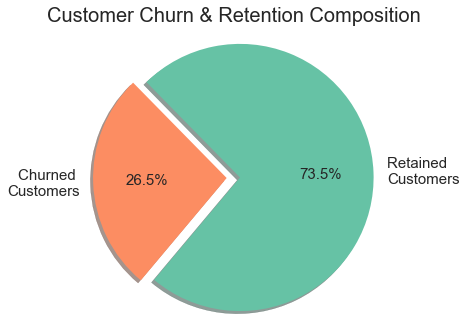

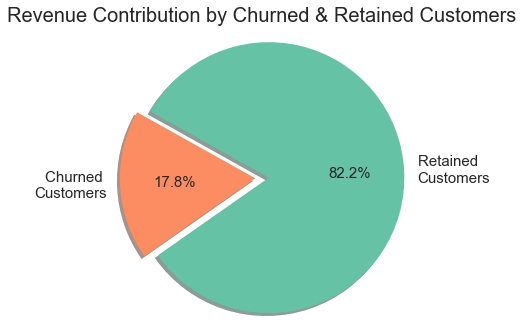

avg churned customer total charge = 1531.8
avg retained customer total charge = 2555.34


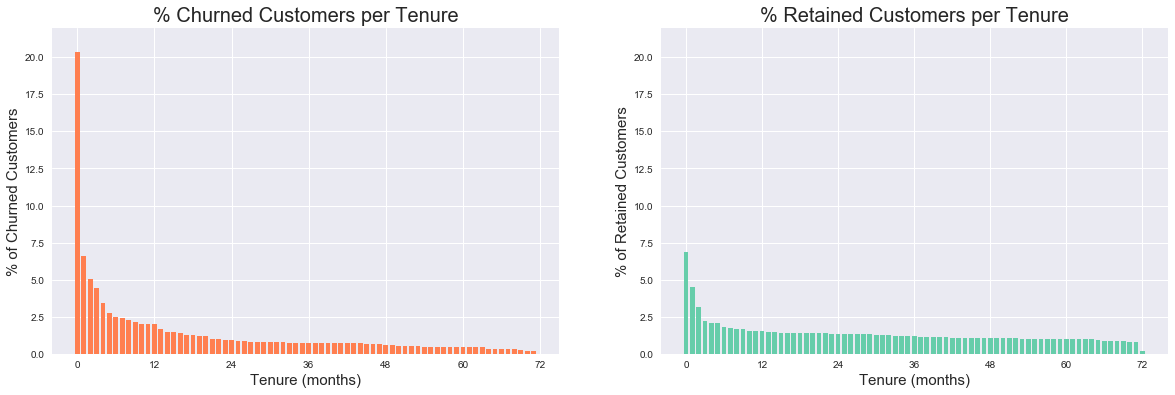

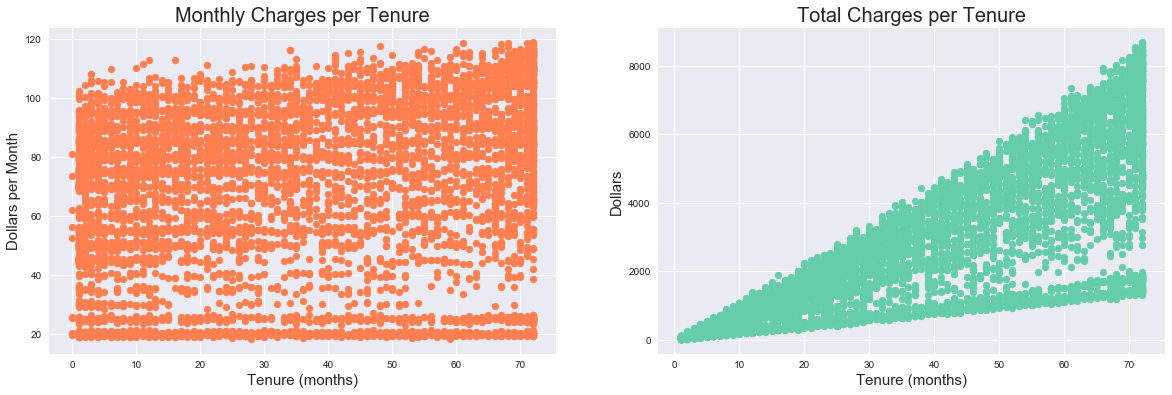

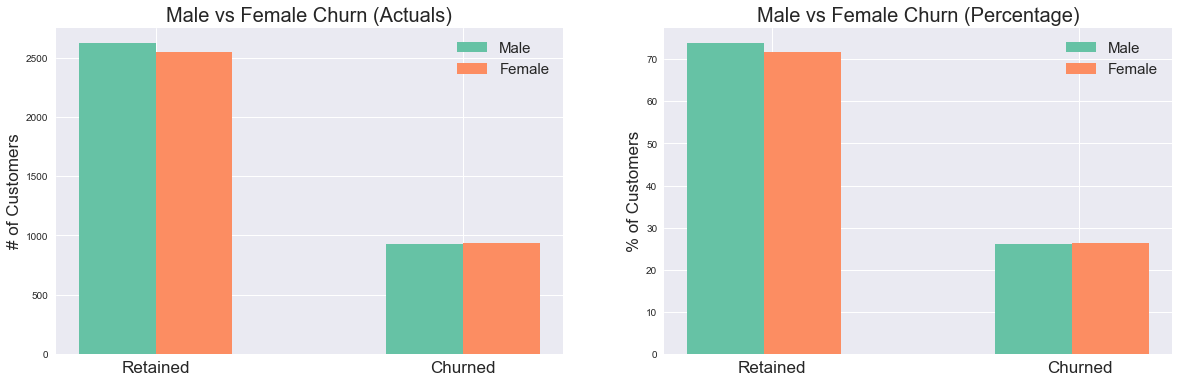

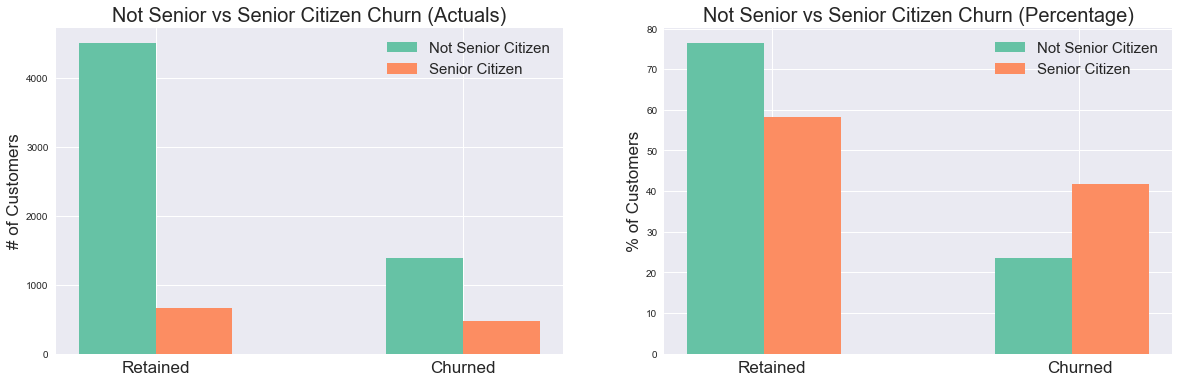

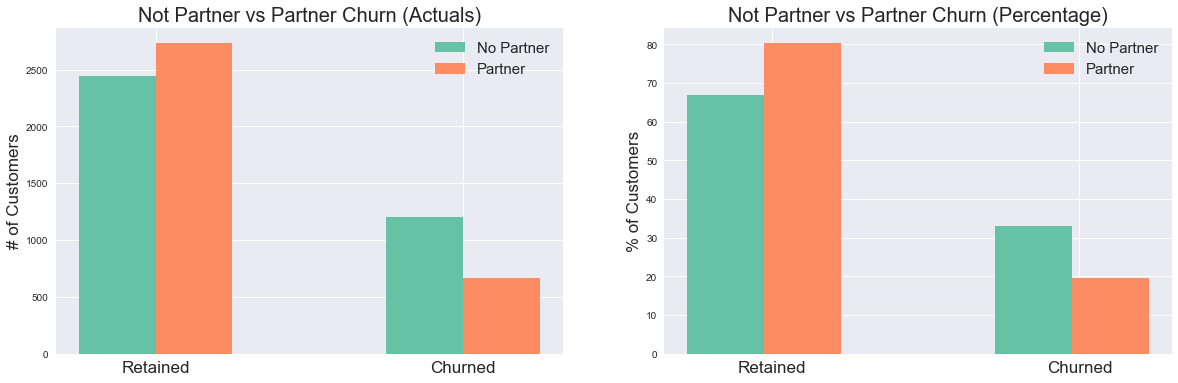

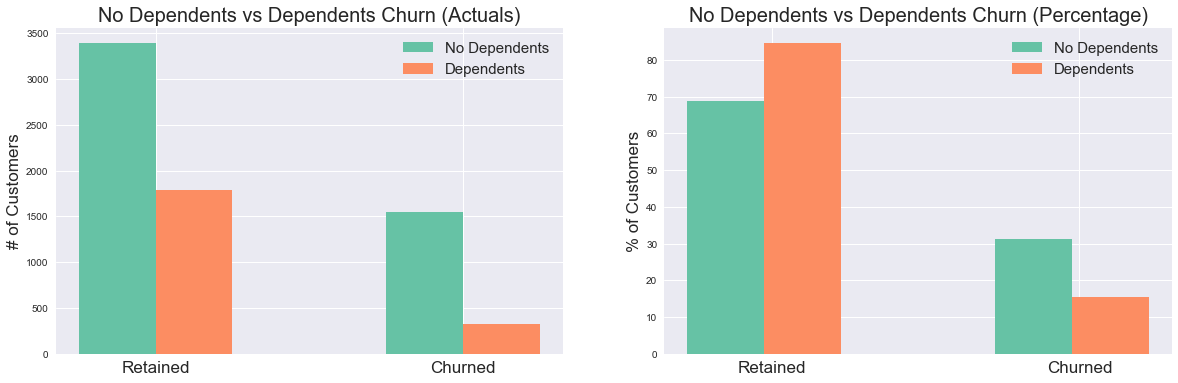

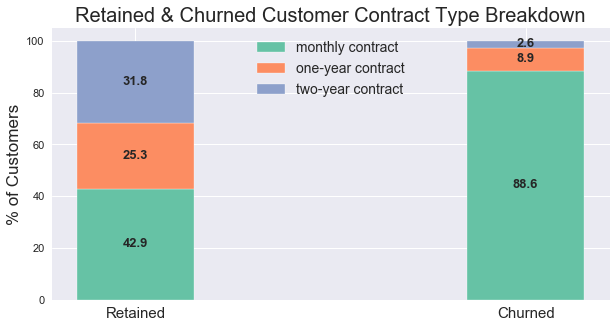

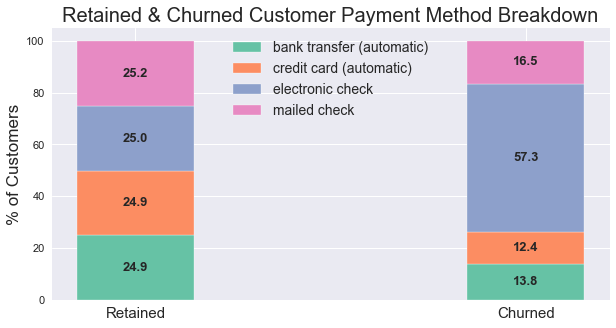

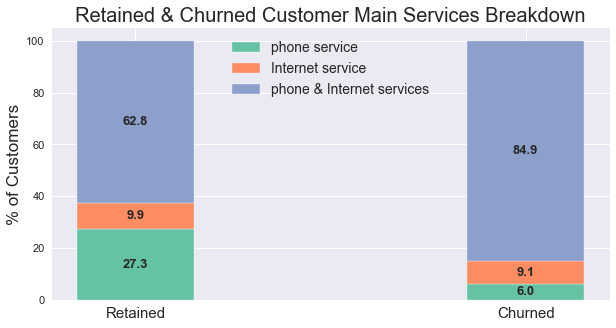

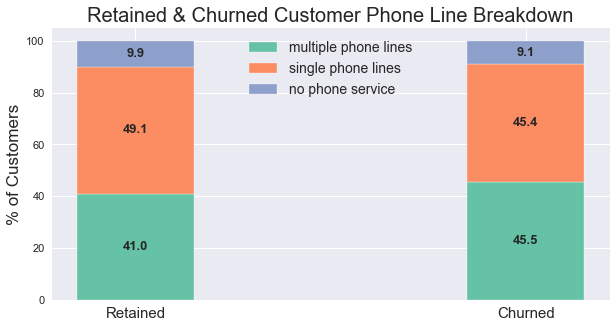

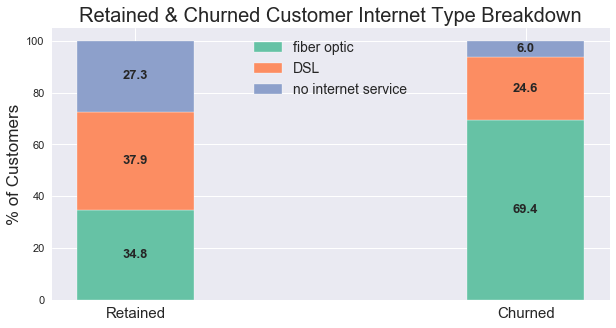

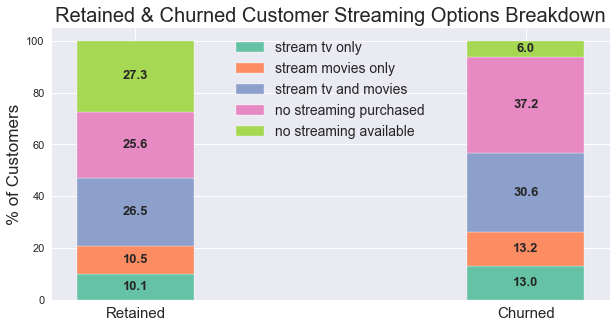

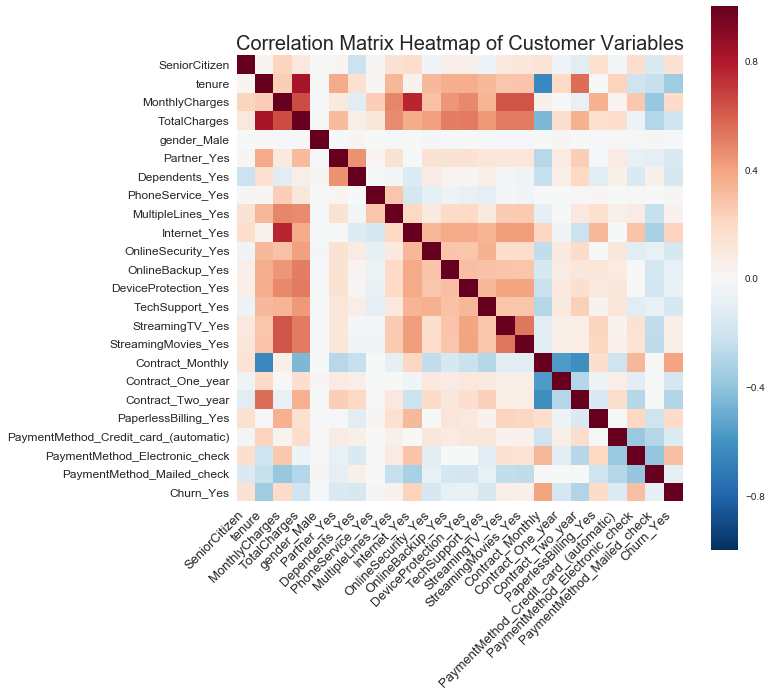

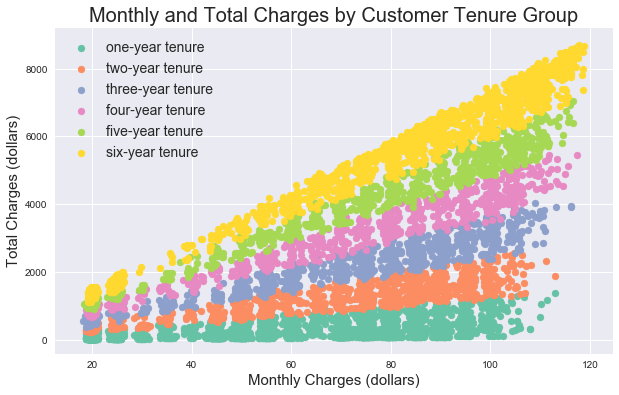

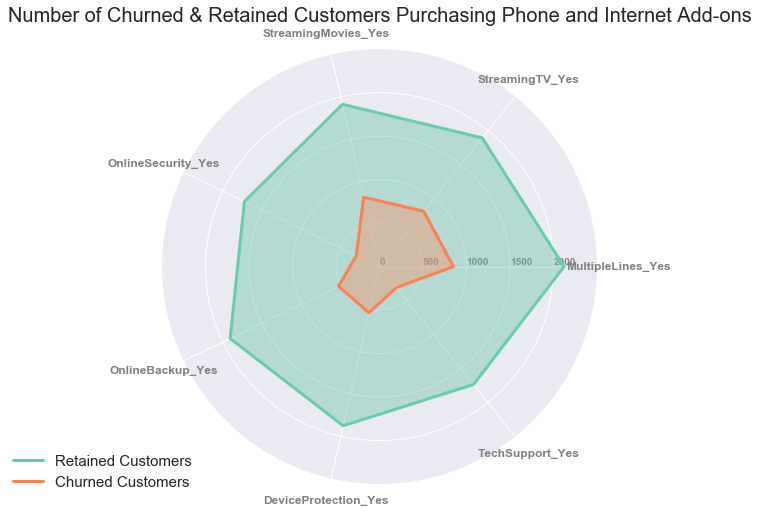

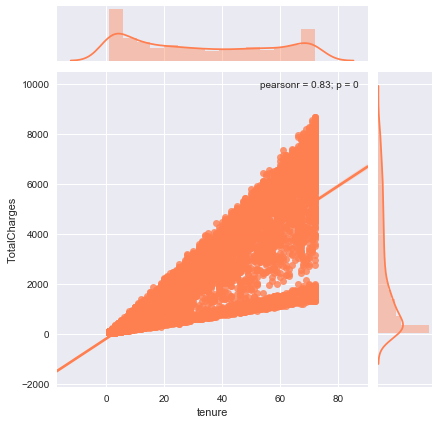

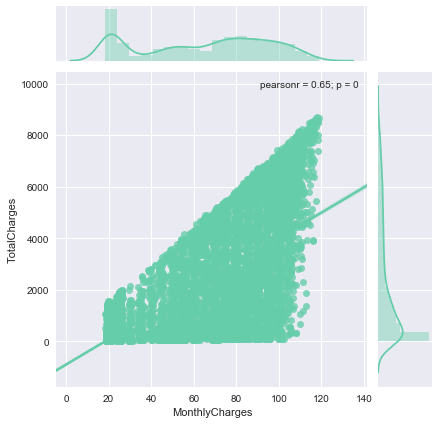

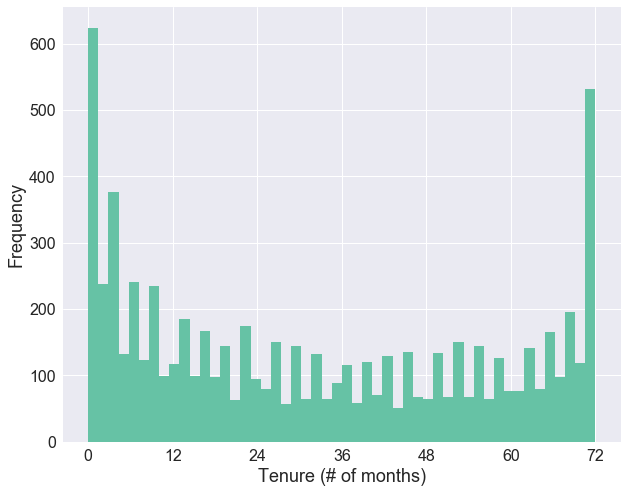

𝐻₀: μ <= 12
𝐻ₐ: μ ≠ 12


IndentationError: unexpected indent (<ipython-input-1-e7799cd8cc91>, line 7)

In [1]:
# Load clean and data-wrangled dataset from previous notebook
%run '/Users/sergiogutierrez/Springboard_projects/Capstone 1/Exploratory Data Analysis (Inferential Statistics) on Telco Data Science Capstone Project.ipynb'

In [3]:
df['DSL_Yes'] = np.where((df.InternetService_Fiber_optic==0) & (df.InternetService_No==0), 1, 0)
df['Tenure_Less_Or_At_12Months'] = np.where((df.tenure <= 12) & (df.Churn_Yes ==1), 1, 0)

model_df = df.rename(columns={'customerID': 'Customer_ID', 'SeniorCitizen': 'SeniorCitizen_Yes', 'tenure': 'Tenure', 
                              'gender_Male': 'Gender_Male','InternetService_Fiber_optic' : 'Fiber_Optic_Yes', 
                              'Contract_Monthly' : 'Contract_Monthly_Yes','Contract_One_year': 'Contract_One_Year_Yes', 
                              'Contract_Two_year': 'Contract_Two_Year_Yes'})

model_df = model_df[model_df.columns.drop(list(df.filter(regex='No'))) 
           & model_df.columns.drop(['PaymentMethod_Credit_card_(automatic)', 
                              'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 
                              'PaperlessBilling_Yes'])]

model_df = model_df.reindex(columns=['Customer_ID', 'Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 
                          'PhoneService_Yes','MultipleLines_Yes', 'Internet_Yes', 'DSL_Yes', 'Fiber_Optic_Yes',
                          'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes', 
                          'StreamingTV_Yes', 'StreamingMovies_Yes','Contract_Monthly_Yes', 'Contract_One_Year_Yes',
                          'Contract_Two_Year_Yes', 'MonthlyCharges', 'Churn_Yes', 'TotalCharges', 'Tenure', 'Tenure_Less_Or_At_12Months'])

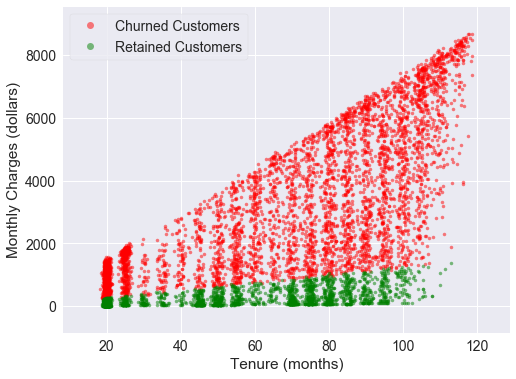

In [138]:
sns.set(font_scale=1.4)

LessOrAt12Months_df = df.loc[df.Tenure_Less_Or_At_12Months==1]
MoreThan12Months_df = df.loc[df.Tenure_Less_Or_At_12Months==0]

plt.figure(figsize=(8,6))
plt.plot(MoreThan12Months_df.MonthlyCharges, MoreThan12Months_df.TotalCharges, marker='.', linestyle='none', alpha=0.5, color='g', label='Customers with 12')
plt.plot(LessOrAt12Months_df.MonthlyCharges, LessOrAt12Months_df.TotalCharges, marker='.', linestyle='none', alpha=0.5, color='r', label='Retained Customers')

plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges (dollars)')
plt.legend(markerscale=2, frameon=True)
plt.margins(0.1)

plt.show()

# Machine Learning Models

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(model_df.iloc[:, 1:21].values, 
                                              (model_df.Tenure_Less_Or_At_12Months==1).values, 
                                              train_size = 0.75, random_state=42)


svc = SVC(random_state=42, probability=True)

# Fit the model on the trainng data.
svc.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(svc.predict(X_test), y_test))

0.819988642817


In [5]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(random_state=42)

# Fit the model on the trainng data.
lrg.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(lrg.predict(X_test), y_test))

0.82793867121


In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

# Fit the model on the trainng data.
rfc.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(rfc.predict(X_test), y_test))

0.775127768313


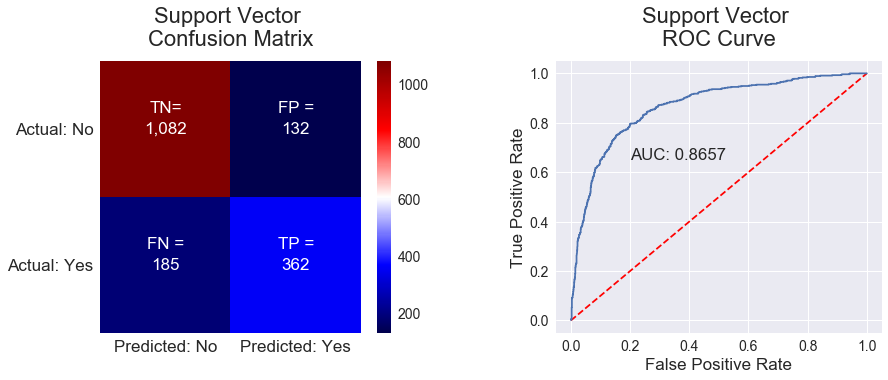

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from matplotlib import rcParams
rcParams['axes.titlepad'] = 15 
text_size = 17

svc_y_pred = svc.predict(X_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred)
svc_confusion_matrix.astype(int)
svc_cm_df = pd.DataFrame(svc_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(svc_cm_df, cmap='seismic', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: Yes', 'Actual: No'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Support Vector \nConfusion Matrix', size=22)
ax[0].text(0.5, 1.6, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.6, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.6, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.6, 'TP =', color='w', va='bottom', ha='center', size=text_size)

svc_y_pred_prob = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svc_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.2, 0.65, "AUC: {}".format(round(roc_auc_score(y_test, svc_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Support Vector \nROC Curve', size=22)

plt.show()

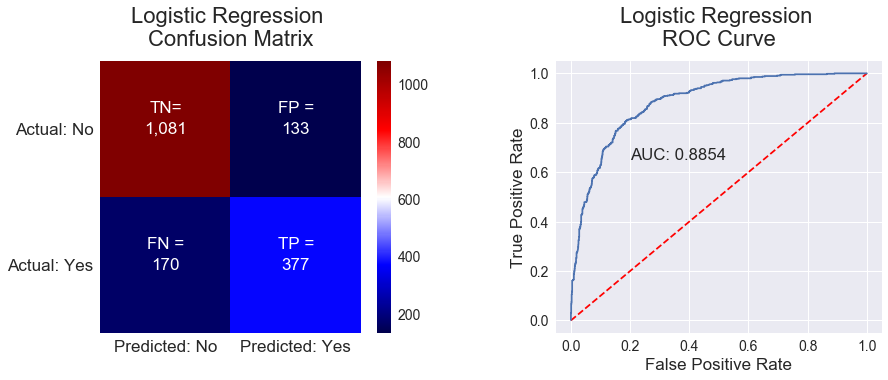

In [123]:
lrg_y_pred = lrg.predict(X_test)
lrg_confusion_matrix = confusion_matrix(y_test, lrg_y_pred)
lrg_confusion_matrix.astype(int)
lrg_cm_df = pd.DataFrame(lrg_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(lrg_cm_df, cmap='seismic', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: Yes', 'Actual: No'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Logistic Regression \nConfusion Matrix', size=22)
ax[0].text(0.5, 1.6, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.6, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.6, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.6, 'TP =', color='w', va='bottom', ha='center', size=text_size)

lrg_y_pred_prob = lrg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lrg_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.2, 0.65, "AUC: {}".format(round(roc_auc_score(y_test, lrg_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Logistic Regression \nROC Curve', size=22)

plt.show()

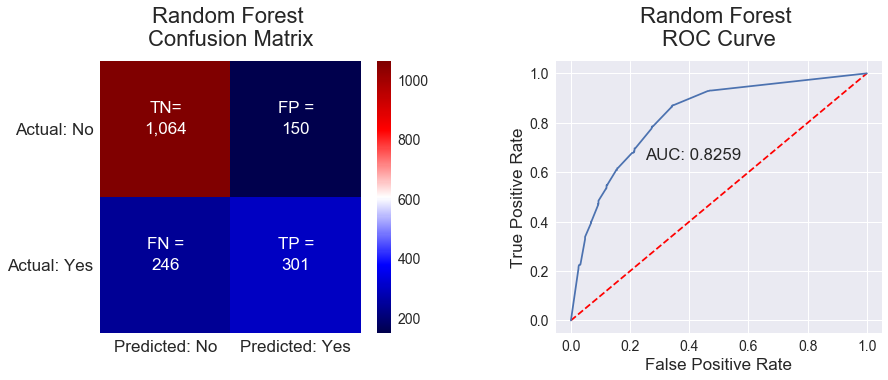

In [126]:
rfc_y_pred = rfc.predict(X_test)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_y_pred)
rfc_confusion_matrix.astype(int)
rfc_cm_df = pd.DataFrame(rfc_confusion_matrix)

figure, ax = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

sns.heatmap(rfc_cm_df, cmap='seismic', annot=True, annot_kws={'size':text_size}, fmt=",", ax=ax[0])
ax[0].set_xticklabels(['Predicted: No', 'Predicted: Yes'], ha="center", size=text_size)
ax[0].set_yticklabels(['Actual: Yes', 'Actual: No'], rotation=360, ha="right", size=text_size)

ax[0].set_title('Random Forest \nConfusion Matrix', size=22)
ax[0].text(0.5, 1.6, 'TN=', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(0.5, 0.6, 'FN =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 1.6, 'FP =', color='w', va='bottom', ha='center', size=text_size)
ax[0].text(1.5, 0.6, 'TP =', color='w', va='bottom', ha='center', size=text_size)

rfc_y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_pred_prob)

ax[1].plot([0, 1], [0, 1], 'k--', color='r')
ax[1].plot(fpr, tpr)
ax[1].text(0.25, 0.65, "AUC: {}".format(round(roc_auc_score(y_test, rfc_y_pred_prob), 4)))
ax[1].set_xlabel('False Positive Rate', size=text_size)
ax[1].set_ylabel('True Positive Rate', size=text_size)
ax[1].set_title('Random Forest \nROC Curve', size=22)

plt.show()

In [131]:
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support


svc_class_report = pd.DataFrame(list(precision_recall_fscore_support(y_test, svc_y_pred)),
                                index=['Precision', 'Recall', 'F1-score', 'Support']).T
svc_class_report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, svc_y_pred, average='weighted')
svc_class_report.loc['Avg/Total', 'Support'] = report['Support'].sum()


lrg_class_report = pd.DataFrame(list(precision_recall_fscore_support(y_test, lrg_y_pred)),
                                index=['Precision', 'Recall', 'F1-score', 'Support']).T
lrg_class_report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, lrg_y_pred, average='weighted')
lrg_class_report.loc['Avg/Total', 'Support'] = report['Support'].sum()


rfc_class_report = pd.DataFrame(list(precision_recall_fscore_support(y_test, rfc_y_pred)),
                                index=['Precision', 'Recall', 'F1-score', 'Support']).T
rfc_class_report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, rfc_y_pred, average='weighted')
rfc_class_report.loc['Avg/Total', 'Support'] = report['Support'].sum()

print(rfc_class_report)
print(lrg_class_report)

           Precision    Recall  F1-score  Support
0           0.812214  0.876442  0.843106   1214.0
1           0.667406  0.550274  0.603206    547.0
Avg/Total   0.767234  0.775128  0.768589   3522.0
           Precision    Recall  F1-score  Support
0           0.864109  0.890445  0.877079   1214.0
1           0.739216  0.689214  0.713340    547.0
Avg/Total   0.825315  0.827939  0.826219   3522.0


# Machine Learning Models

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_param_grid = {'kernel':('linear', 'rbf'), 
                  'C':[1, 10]}

svc_cv = GridSearchCV(svc, svc_param_grid)

svc_cv.fit(X_train, y_train)

print("Accuracy scores: {}".format(np.around(svc_cv.cv_results_['mean_test_score'], decimals=4)))
print("Best score: {}".format(round(svc_cv.best_score_, 4)))
print("Best score's parameters: {}".format(svc_cv.best_params_)) 

In [ ]:
lrg_param_grid = {"C": [0.001, 0.1, 1, 10, 100], 
                  "penalty":["l1","l2"]}

lrg_cv = GridSearchCV(lrg, lrg_param_grid)

lrg_cv.fit(X_train, y_train)

print("Accuracy scores: {}".format(np.around(lrg_cv.cv_results_['mean_test_score'], decimals=4)))
print("Best score: {}".format(round(lrg_cv.best_score_, 4)))
print("Best score's parameters: {}".format(lrg_cv.best_params_)) 

In [ ]:
# Setup the hyperparameter grid
rfc_param_grid = {'n_estimators': [200, 700],
                  'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

rfc_cv = GridSearchCV(rfc, rfc_param_grid)

# Fit it to the data
rfc_cv.fit(X_train, y_train)

print("Accuracy scores: {}".format(np.around(rfc_cv.cv_results_['mean_test_score'], decimals=4)))
print("Best score: {}".format(round(rfc_cv.best_score_, 4)))
print("Best score's parameters: {}".format(rfc_cv.best_params_)) 